In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import datetime
import re

# Đọc file csv
df = pd.read_json("CHOTOT_motorcycles2.json")

# Xem 5 dòng đầu
df.head(10)

,name,Year_of_manufacture,Kilometers_driven,Nationality,Location,Listing_time,price,price_min,price_max
0,Ex xuống áo 2010 đỏ đen đẹp keng nợ xấu đưa 9t...,2013,1234 km,Đang cập nhật,"Phường Hòa Khê, Quận Thanh Khê, Đà Nẵng",Đăng 14 ngày trước,26.800.000 đ,13 triệu,16 triệu
1,Vespa primavera xanh bơ 2017 máy iget có trả g...,2017,12000 km,Đang cập nhật,"Phường Hòa Khê, Quận Thanh Khê, Đà Nẵng",Đăng 16 ngày trước,32.500.000 đ,24 triệu,29 triệu
2,xe chính chủ cần bán - 123295558,2019,48000 km,Việt Nam,"Phường Mỹ An, Quận Ngũ Hành Sơn, Đà Nẵng",,25.500.000 đ,24 triệu,28 triệu
3,bán xe ab 2014 biển 43 mới 90% máy rin - 12329...,2014,12345 km,Đang cập nhật,"Phường Hòa Khánh Nam, Quận Liên Chiểu, Đà Nẵng",Đăng 7 phút trước,20.500.000 đ,15 triệu,17 triệu
4,Cần xe dream hay future - 123000977,2001,12822 km,Nhật Bản,"Phường Hòa Minh, Quận Liên Chiểu, Đà Nẵng",Đăng 8 phút trước,123.456.789 đ,7 triệu,8 triệu
5,Pass xe zoomer 50cc máy còn zin - 121705464,2006,15000 km,Nhật Bản,"Phường Hoà Quý, Quận Ngũ Hành Sơn, Đà Nẵng",Đăng 9 phút trước,13.000.000 đ,4 triệu,5 triệu
6,Cần bay Sirius 100 up 54zz đã dọn full kiểng -...,2007,0 km,Việt Nam,"Phường Hòa Khánh Bắc, Quận Liên Chiểu, Đà Nẵng",Đăng 31 phút trước,9.000.000 đ,6 triệu,7 triệu
7,Mio Clasico ( 43 ) - 123224951,2010,0 km,Nhật Bản,"Phường Nại Hiên Đông, Quận Sơn Trà, Đà Nẵng",Đăng 1 giờ trước,9.800.000 đ,5 triệu,6 triệu
8,SH 2019 biển 43 máy móc rin ngon chạy nhẹ tơn ...,2019,1 km,Đang cập nhật,"Phường Hòa Khánh Nam, Quận Liên Chiểu, Đà Nẵng",Đăng 1 giờ trước,60.500.000 đ,64 triệu,75 triệu
9,Vario 2021 khoá bếp ga biển 43 máy móc rin ngo...,2021,1 km,Đang cập nhật,"Phường Hòa Khánh Nam, Quận Liên Chiểu, Đà Nẵng",Đăng 1 giờ trước,36.500.000 đ,32 triệu,38 triệu


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34244\17294803.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_year_counts.index.astype(int), y=filtered_year_counts.values, palette="Blues_r")


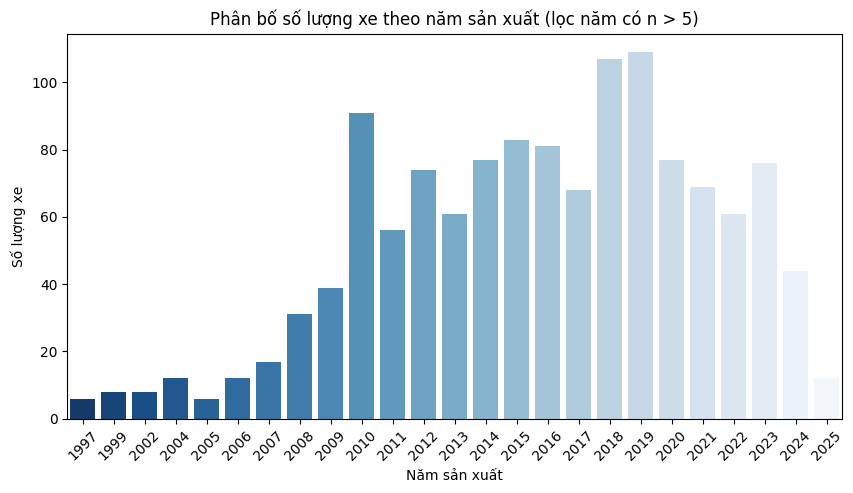

In [5]:
# Chuyển cột "Year_of_manufacture" thành kiểu số
df["Year_of_manufacture"] = pd.to_numeric(df["Year_of_manufacture"], errors="coerce")

# Đếm số lượng xe theo từng năm sản xuất
year_counts = df["Year_of_manufacture"].value_counts()

# Lọc các năm có số lượng xe > 5
filtered_year_counts = year_counts[year_counts > 5]

# Kiểm tra nếu có dữ liệu để vẽ biểu đồ
if not filtered_year_counts.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=filtered_year_counts.index.astype(int), y=filtered_year_counts.values, palette="Blues_r")
    plt.xticks(rotation=45)
    plt.xlabel("Năm sản xuất")
    plt.ylabel("Số lượng xe")
    plt.title("Phân bố số lượng xe theo năm sản xuất (lọc năm có n > 5)")
    plt.show()
else:
    print("Không có năm nào có số lượng xe > 5 để vẽ biểu đồ.")

Thống kê Listing_days:
count    1317.000000
mean        7.790433
std         5.802222
min         1.000000
25%         2.000000
50%         7.000000
75%        12.000000
max        31.000000
Name: Listing_days, dtype: float64
Số lượng NaT trong Listing_date: 6
Ngày cũ nhất: 2025-02-15 00:00:00
Ngày mới nhất: 2025-03-18 00:00:00
Khoảng cách giữa ngày cũ nhất và mới nhất: 31 ngày


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34244\211615395.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_trend = df.groupby("Time_Group")["price"].mean().reset_index()


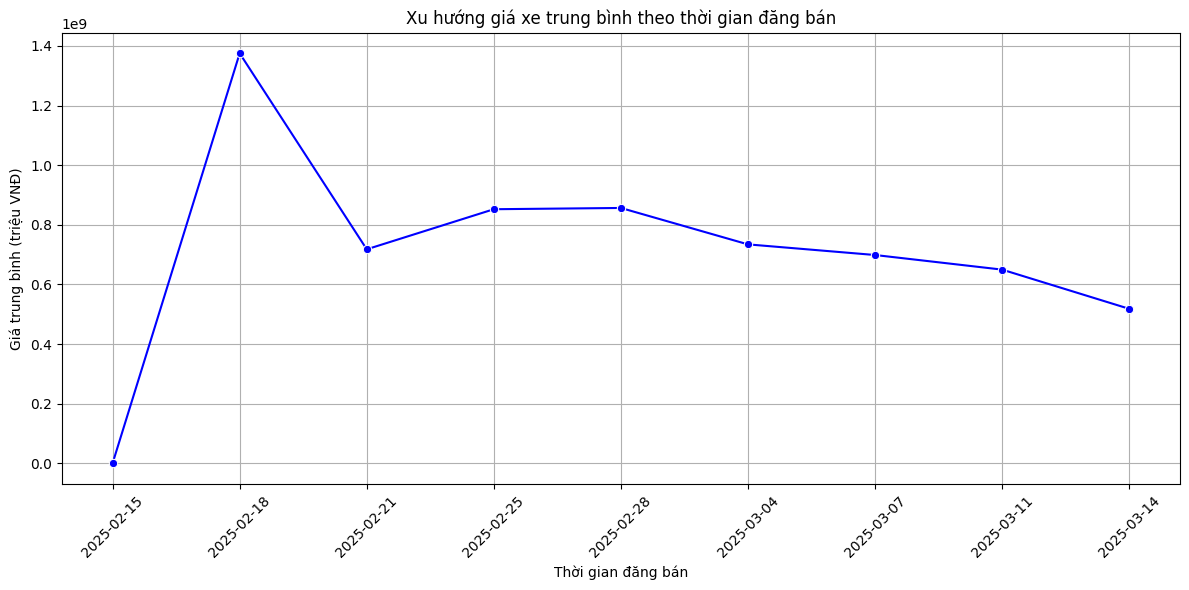

In [13]:
# Tiền xử lý giá
df["price"] = df["price"].astype(str)
df["price"] = df["price"].str.replace(" đ", "", regex=False).str.replace(".", "", regex=False)

# Chuyển price thành số, nếu không thể chuyển thì thành NaN
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Loại bỏ các dòng có price là NaN
df = df.dropna(subset=["price"])

# Chuyển price sang triệu VNĐ
df["price"] = df["price"] / 1_000_000

# Xác định ngày hiện tại (giả định hôm nay là 19/03/2025)
current_date = datetime.datetime(2025, 3, 18)

# Trích xuất số ngày từ Listing_time
df["Listing_days"] = df["Listing_time"].str.extract(r"(\d+)").astype(float)

# Kiểm tra thống kê
print("Thống kê Listing_days:")
print(df["Listing_days"].describe())

# Tạo cột ngày đăng bán
df["Listing_date"] = current_date - pd.to_timedelta(df["Listing_days"], unit="D")

# Kiểm tra xem có NaT nào không
print(f"Số lượng NaT trong Listing_date: {df['Listing_date'].isna().sum()}")

# Xác định ngày cũ nhất & ngày mới nhất
oldest_date = df["Listing_date"].min()
newest_date = current_date  # Ngày mới nhất là hôm nay

print(f"Ngày cũ nhất: {oldest_date}")
print(f"Ngày mới nhất: {newest_date}")

# Kiểm tra khoảng cách giữa ngày cũ nhất và mới nhất (tính bằng ngày)
date_diff = (newest_date - oldest_date).days
print(f"Khoảng cách giữa ngày cũ nhất và mới nhất: {date_diff} ngày")

# Tạo các nhóm thời gian
if date_diff == 0:
    print("Tất cả dữ liệu đều từ cùng một ngày. Phân nhóm theo ngày không có ý nghĩa.")
    df["Time_Group"] = df["Listing_days"].apply(lambda x: f"{int(x)} ngày trước")
    
    price_trend = df.groupby("Time_Group")["price"].mean().reset_index()
    
    unique_days = sorted(df["Listing_days"].unique(), reverse=True)
    time_order = [f"{int(x)} ngày trước" for x in unique_days]
    
    price_trend["Time_Group"] = pd.Categorical(
        price_trend["Time_Group"], 
        categories=time_order, 
        ordered=True
    )
    price_trend = price_trend.sort_values("Time_Group")
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=price_trend, x="Time_Group", y="price", marker="o", color="b")
    
    plt.xlabel("Thời gian đăng bán")
    plt.ylabel("Giá trung bình (triệu VNĐ)")
    plt.title("Xu hướng giá xe trung bình theo thời gian đăng bán")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
else:
    num_intervals = min(10, date_diff + 1)
    date_range = pd.date_range(start=oldest_date, end=newest_date, periods=num_intervals)
    
    df["Time_Group"] = pd.cut(
        df["Listing_date"], 
        bins=date_range.tolist(), 
        labels=[d.strftime('%Y-%m-%d') for d in date_range[:-1]],
        include_lowest=True
    )
    
    price_trend = df.groupby("Time_Group")["price"].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=price_trend, x="Time_Group", y="price", marker="o", color="b")
    
    plt.xlabel("Thời gian đăng bán")
    plt.ylabel("Giá trung bình (triệu VNĐ)")
    plt.title("Xu hướng giá xe trung bình theo thời gian đăng bán")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)

plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34244\108877681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary["Price"] = pd.to_numeric(df_binary["Price"].str.replace(".", "").str.replace(" đ", ""), errors="coerce")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34244\108877681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary["Brand"] = df_binary["Name"].str.extract(r"(honda|yamaha|suzuki|kawasaki|ducati|harley|piaggio|vespa|sym|benelli|ktm|bmw)", flags=re.IGNORECASE)
C:\Users\ADMIN\Ap

                                                Name        Price  \
0  Ex xuống áo 2010 đỏ đen đẹp keng nợ xấu đưa 9t...   26800000.0   
1  Vespa primavera xanh bơ 2017 máy iget có trả g...   32500000.0   
2                   xe chính chủ cần bán - 123295558   25500000.0   
3  bán xe ab 2014 biển 43 mới 90% máy rin - 12329...   20500000.0   
4                Cần xe dream hay future - 123000977  123456789.0   

                                         Location    Year        Km  Brand  \
0         Phường Hòa Khê, Quận Thanh Khê, Đà Nẵng  2013.0   1234 km    NaN   
1         Phường Hòa Khê, Quận Thanh Khê, Đà Nẵng  2017.0  12000 km  Vespa   
2        Phường Mỹ An, Quận Ngũ Hành Sơn, Đà Nẵng  2019.0  48000 km    NaN   
3  Phường Hòa Khánh Nam, Quận Liên Chiểu, Đà Nẵng  2014.0  12345 km    NaN   
4       Phường Hòa Minh, Quận Liên Chiểu, Đà Nẵng  2001.0  12822 km    NaN   

   Price_Million  
0      26.800000  
1      32.500000  
2      25.500000  
3      20.500000  
4     123.456789  


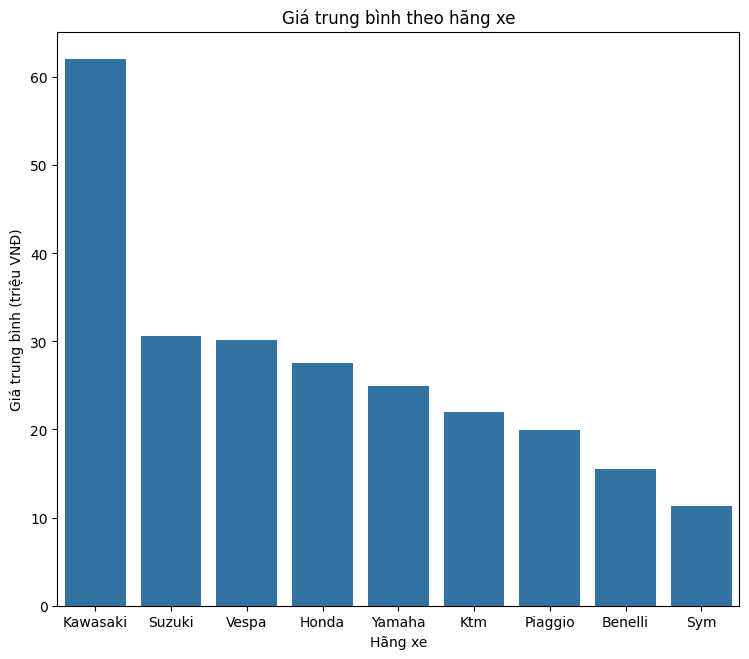

In [6]:

# Chọn các cột cần thiết và đổi tên
df_binary = df[["name", "price", "Location", "Year_of_manufacture", "Kilometers_driven"]]
df_binary.columns = ["Name", "Price", "Location", "Year", "Km"]

# Xử lý các cột số
df_binary["Price"] = pd.to_numeric(df_binary["Price"].str.replace(".", "").str.replace(" đ", ""), errors="coerce")


# Trích xuất hãng xe từ tên
df_binary["Brand"] = df_binary["Name"].str.extract(r"(honda|yamaha|suzuki|kawasaki|ducati|harley|piaggio|vespa|sym|benelli|ktm|bmw)", flags=re.IGNORECASE)
df_binary["Brand"] = df_binary["Brand"].str.title()

# Tạo cột giá theo triệu đồng để dễ hiểu
df_binary["Price_Million"] = df_binary["Price"] / 1000000


print(df_binary.head())


fig = plt.figure(figsize=(22, 25))

ax5 = plt.subplot2grid((4, 3), (1, 1))
brand_price = df_binary.groupby("Brand")["Price_Million"].mean().sort_values(ascending=False).dropna()
sns.barplot(x=brand_price.index, y=brand_price.values, ax=ax5)
ax5.set_title("Giá trung bình theo hãng xe")
ax5.set_xlabel("Hãng xe")
ax5.set_ylabel("Giá trung bình (triệu VNĐ)")

plt.tight_layout()
plt.savefig("motorcycle_analysis.png", dpi=300)
plt.show()

